# Graph data visualization

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

from KernelChallenge.preprocessing import preprocess
from KernelChallenge.preprocessing import preprocess_one

In [2]:
data_path = Path('data/')
train_data = pd.read_pickle(data_path / 'training_data.pkl')

Try to color atoms with relevant colors (C: grey, O: red...)

In [4]:
nodes_colors = ['tab:red', 'tab:grey', 'tab:green', 'tab:orange',
                'tab:blue', 'tab:purple', 'tab:yellow', 'tab:cyan', 'tab:olive'
                ]
# Up to 50 atoms, add lots of colors for the rest
cm = plt.get_cmap('jet')(np.arange(40))
nodes_colors += list(cm)

# Same for bondings
edges_colors = ['k', 'tab:orange', 'tab:blue']

In [5]:
def plot_graph(G,
               ax=None,
               nodes_colors=nodes_colors,
               edges_colors=edges_colors,
               width=3,
               node_size=200):

    labels = nx.get_node_attributes(G, name="labels")
    labels_colors = {}
    edges_color_list = []
    for k, v in labels.items():
        labels[k] = v[0]
        labels_colors[k] = nodes_colors[v[0]]
    for _, _, bond in G.edges(data='labels'):
        edges_color_list.append(edges_colors[bond[0]])

    nx.draw(
        G,
        with_labels=True,
        labels=labels,
        font_weight='bold',
        node_color=list(labels_colors.values()),
        edge_color=edges_color_list,
        width=width,
        node_size=node_size,
        ax=ax,
    )

c:\Users\josep\miniconda3\envs\KernelChallenge\lib\site-packages\matplotlib\cbook\__init__.py:1062: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


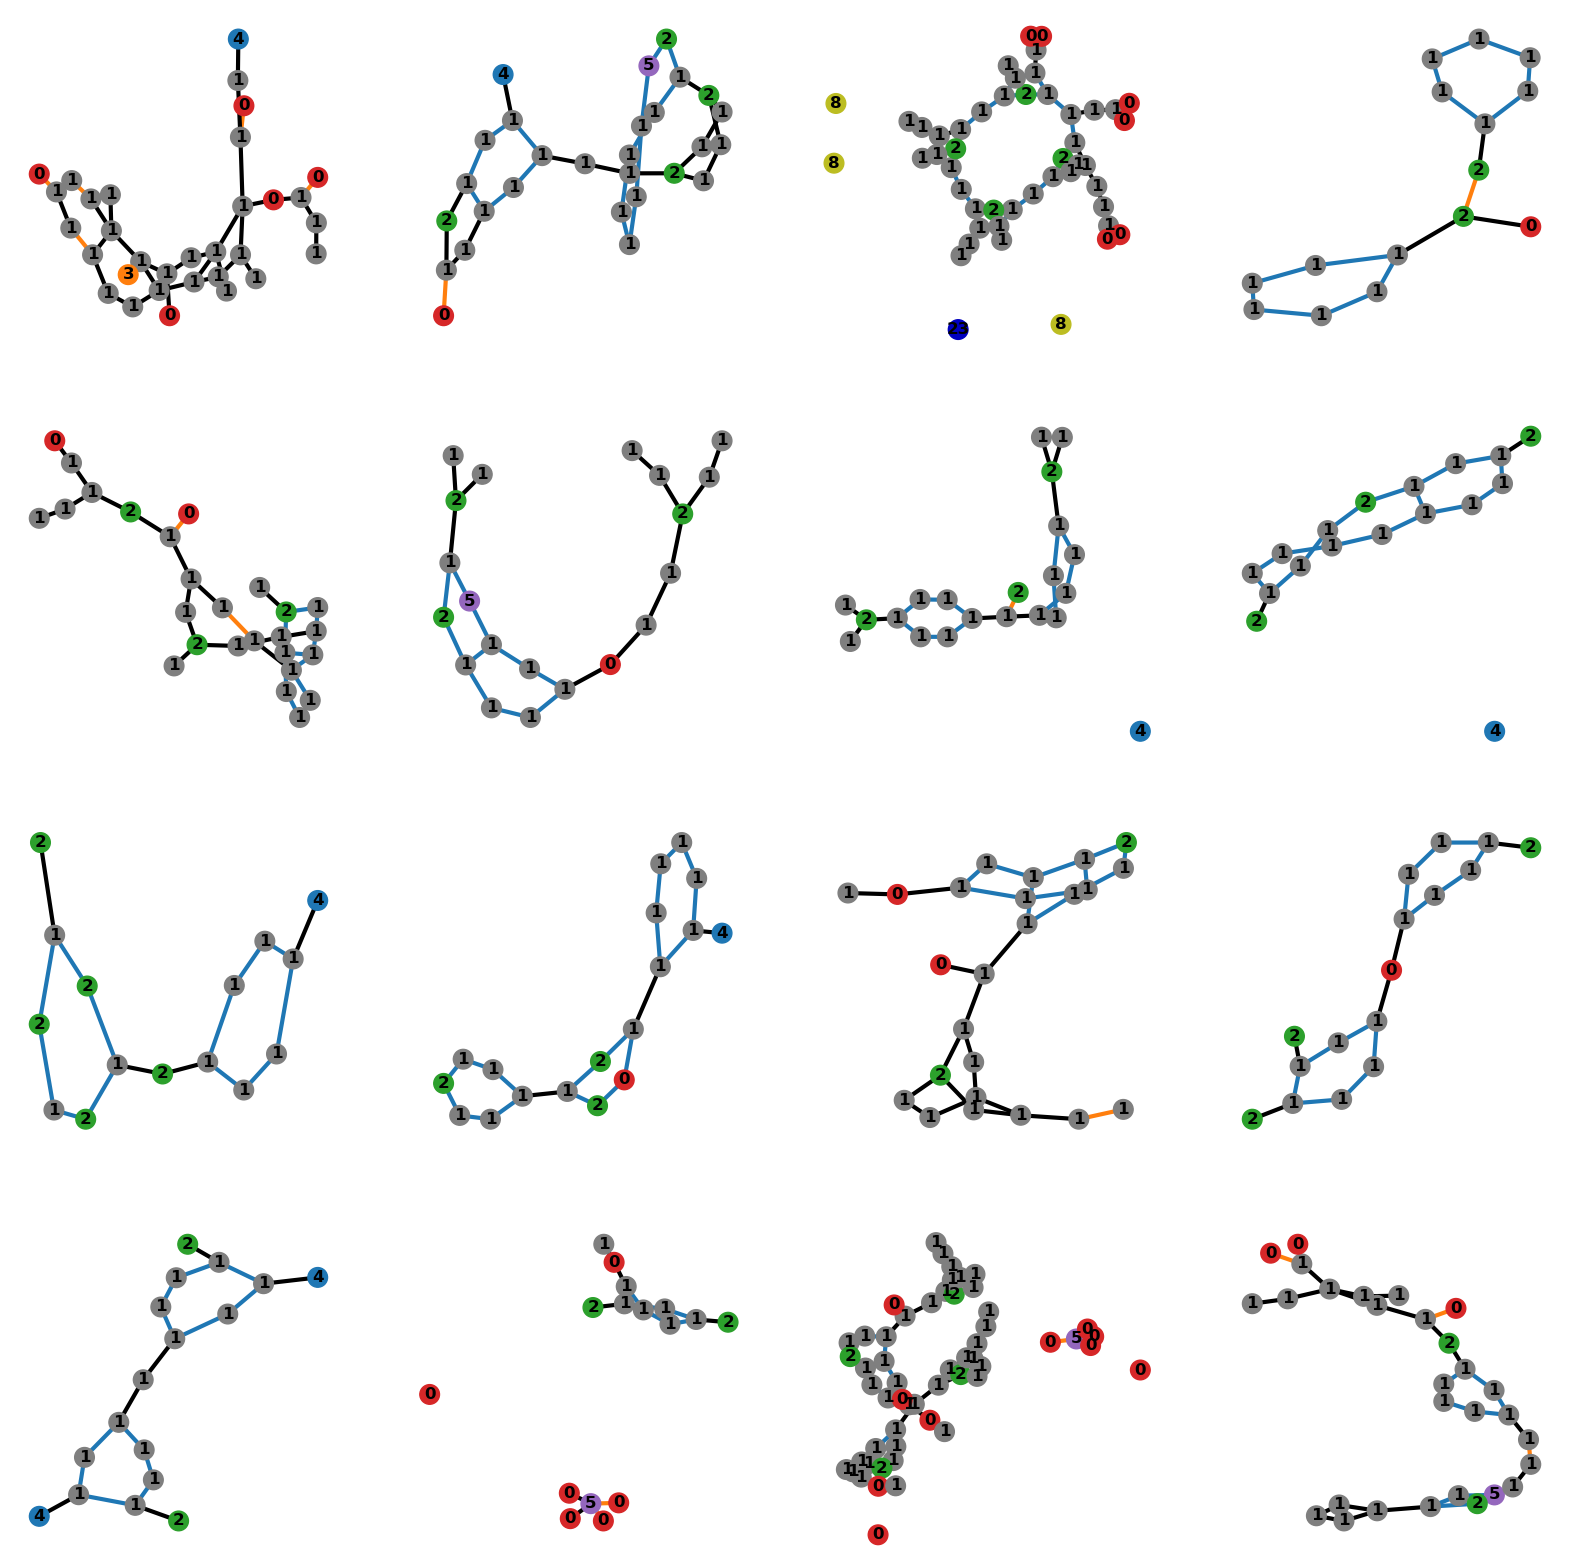

In [6]:
labels = pd.read_pickle(data_path / 'training_labels.pkl')
labels_pos = labels_pos = np.argwhere(labels).reshape(1, -1)[0]
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Plot 16 molecules that have the poperty
for i in range(16):
    plot_graph(
        train_data[labels_pos[i]],
        ax=axes.ravel()[i])


As shown above, several molecules have several connected components, a preprocessing step is implemented to keep only the largest connected component of the graph.

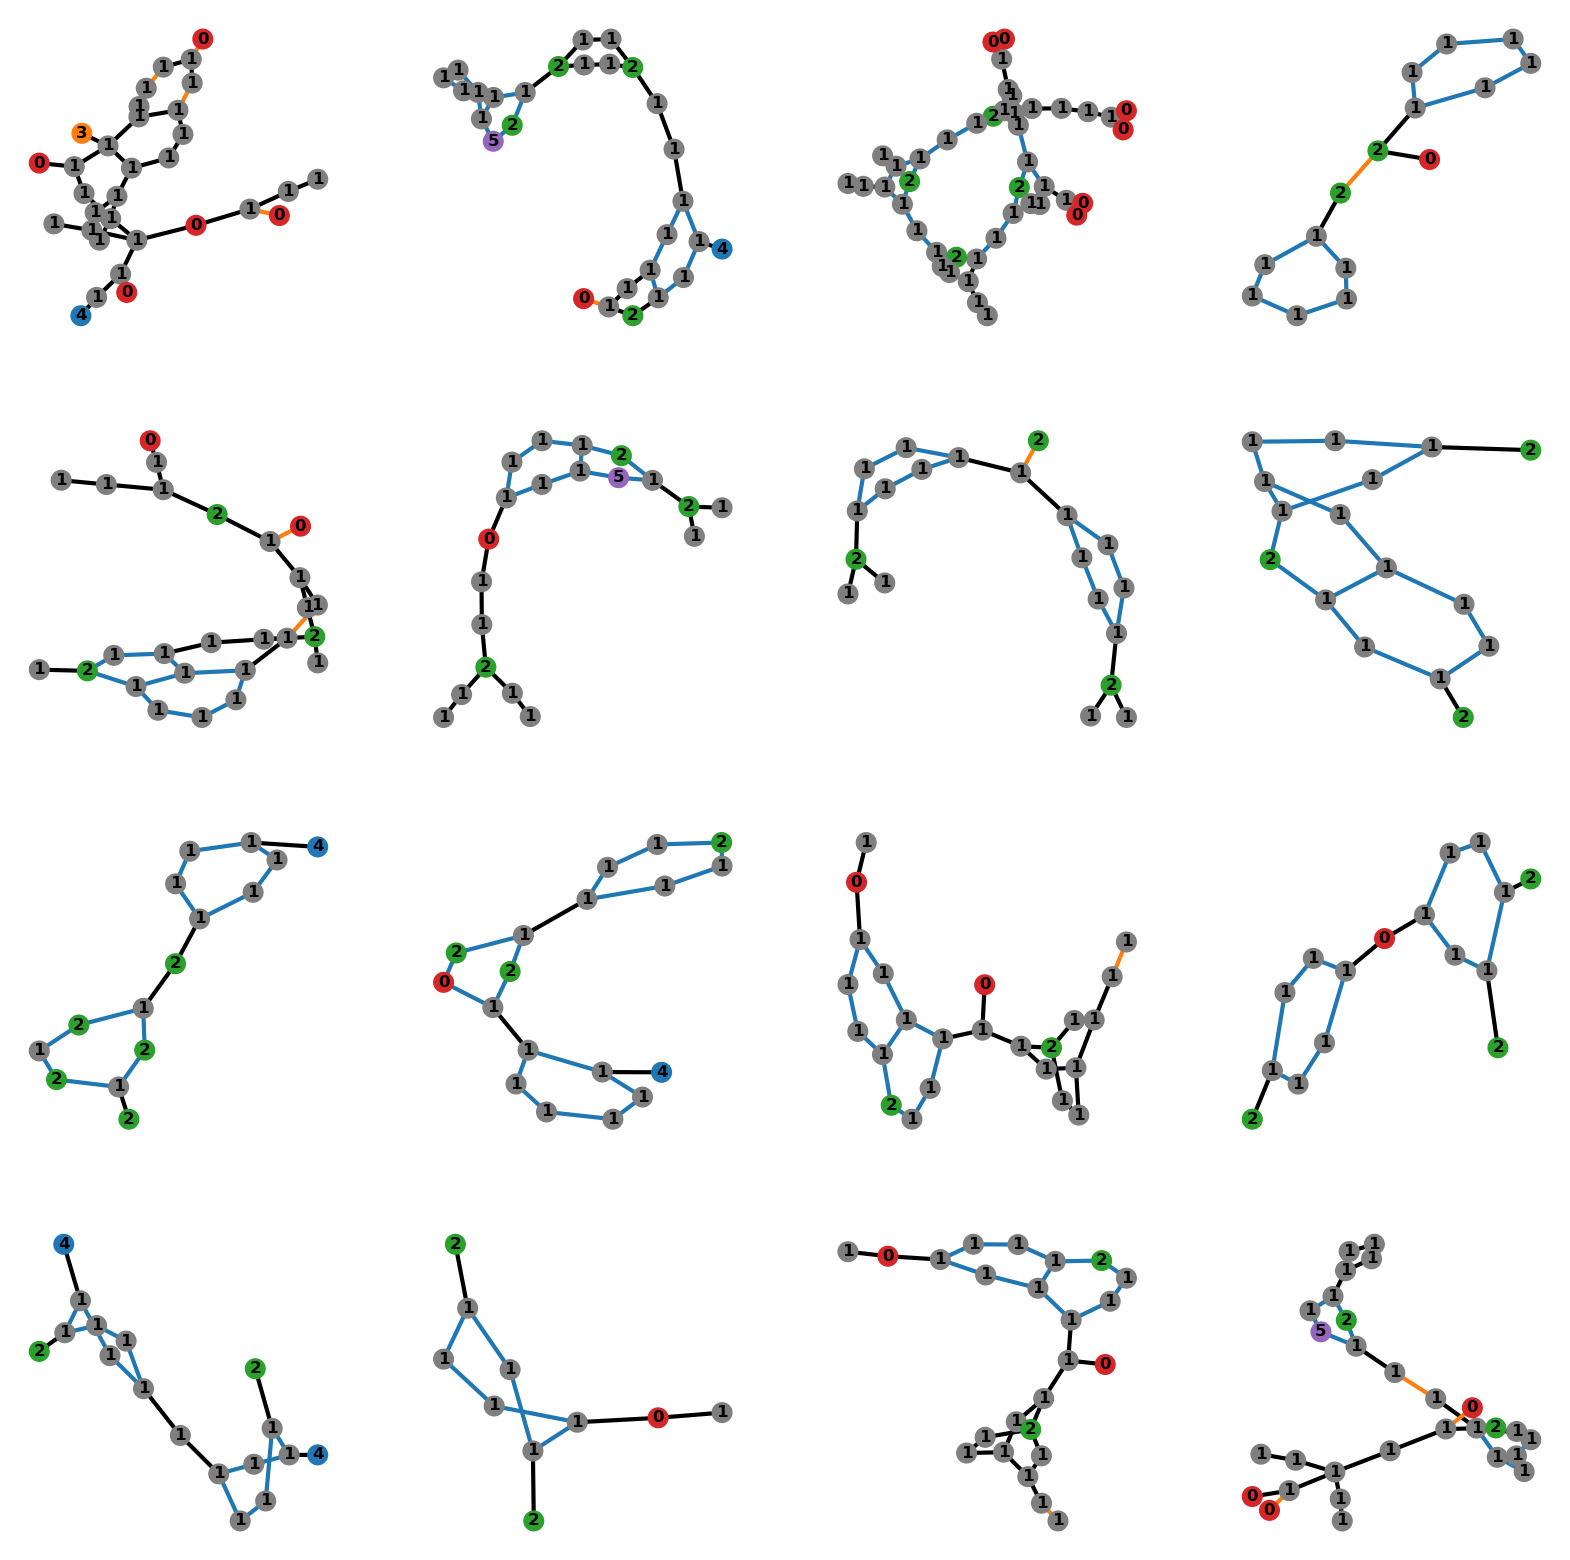

In [7]:
preprocessed_graph = preprocess(
    train_data, preprocess_f0=preprocess_one, n_jobs=10)
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Plot 16 molecules that have the poperty
for i in range(16):
    plot_graph(
        preprocessed_graph[labels_pos[i]],
        ax=axes.ravel()[i])

In [4]:
data_path = Path('data/')
train_data = pd.read_pickle(data_path / 'training_data.pkl')
labels = pd.read_pickle(data_path / 'training_labels.pkl')

In [6]:
sub_train = train_data[:50]
pd.to_pickle(sub_train, './tests/data.pkl')
sub_labels = labels[:50]
pd.to_pickle(sub_labels, './tests/labels.pkl')